# Vector Rayleigh-Sommerfeld method (VRS)


In [8]:
from matplotlib import rcParams
rcParams['figure.dpi']=250


In [2]:
from diffractio import np, sp, plt, nm, um, mm, degrees
from matplotlib import cm

from diffractio.vector_sources_XY import Vector_source_XY
from diffractio.scalar_masks_XY import Scalar_mask_XY
from diffractio.scalar_fields_XY import Scalar_field_XY
from diffractio.scalar_sources_XY import Scalar_source_XY

from diffractio.vector_fields_XY import Vector_field_XY

## Radial polarized Gaussian beam through a circular aperture


In [3]:
size=6.4*um
x0=np.linspace(-size,size,512)
y0=np.linspace(-size,size,512)


In [4]:
wavelength=.640*um

radius=10*wavelength/2
z_obs=10*um
beam_width=6*um/(2*np.sqrt(2))

In [5]:
u0=Scalar_source_XY(x0,y0,wavelength)
u0.gauss_beam(A=1,r0=(0,0), z0=0, w0=beam_width)

t0=Scalar_mask_XY(x0,y0,wavelength)
t0.circle(r0=(0,0), radius=radius)

t=u0*t0

In [6]:
E0 = Vector_source_XY(x0,y0,wavelength)
E0.radial_wave(u=t,r0=(0,0))

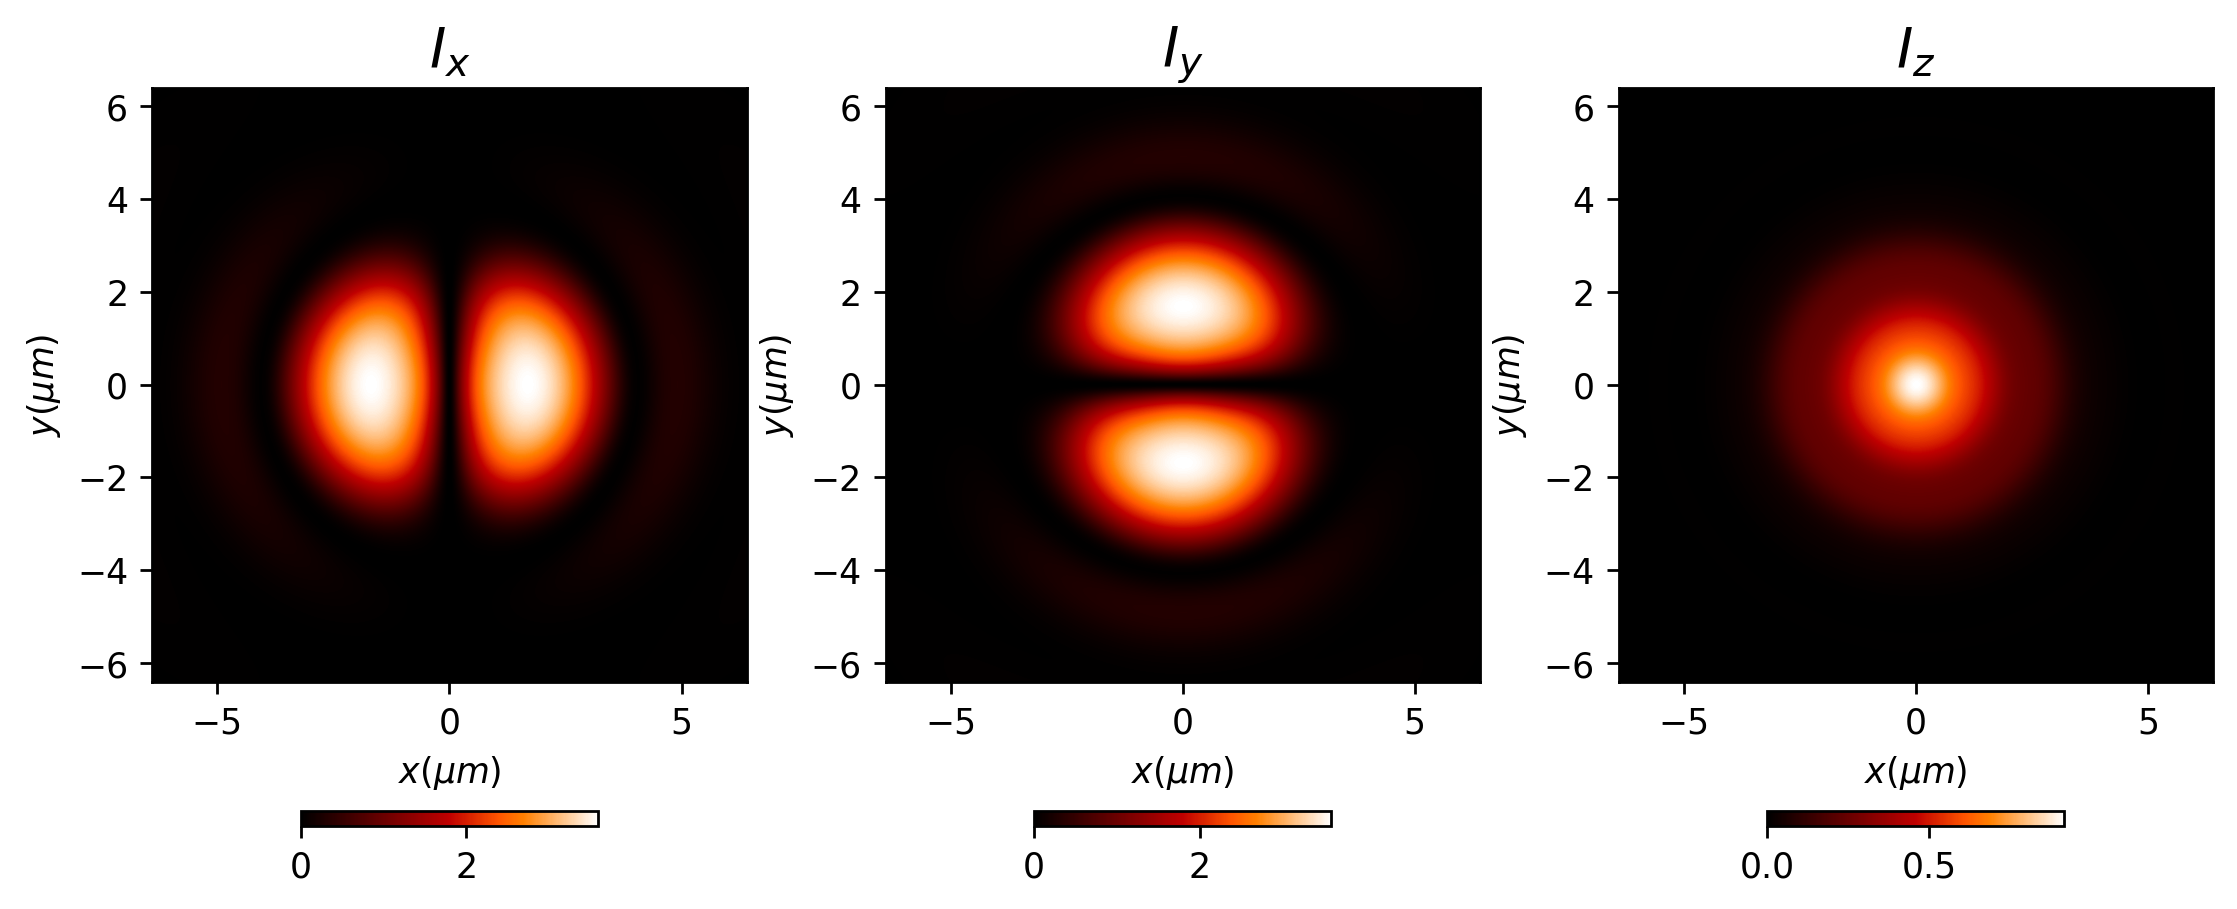

In [9]:
E1=E0.VRS(z=z_obs, n=1, new_field=True)
E1.draw('intensities', logarithm=1e2);

## Focusing with a lens a beam with a high $E_z$ component
In Figures 4 and 5 a planar lens formed by rings is developed in order to obtain a high $E_z$ component. The data of the radii are shown in Table 1.

In [20]:
size=30*um
x0=np.linspace(-size,size,1024)
y0 = np.linspace(-size, size, 1024)


In [21]:
wavelength=.6328*um
focal=10*um

In [22]:
u0=Scalar_source_XY(x0,y0,wavelength)
u0.plane_wave(A=1)

t0=Scalar_mask_XY(x0,y0,wavelength)
t0.lens(r0=(0,0), focal=focal, radius=20*um)

t1=u0*t0

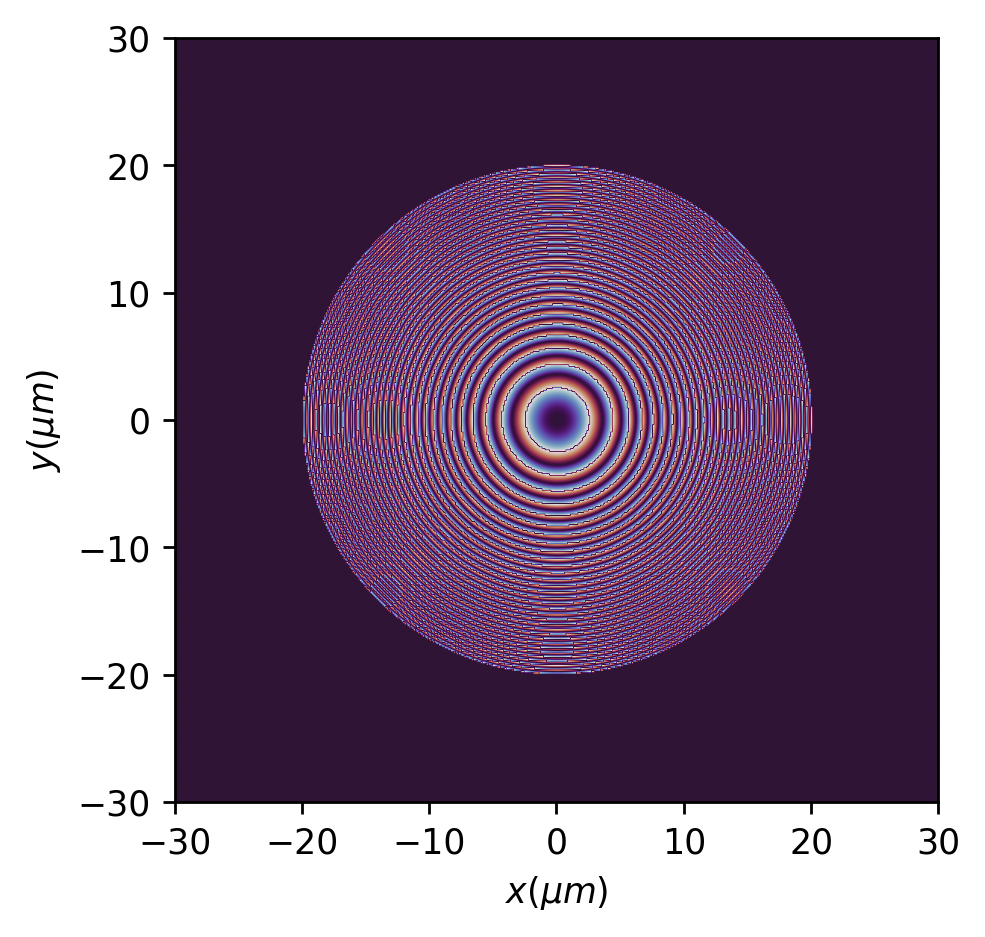

In [23]:
t0.draw('phase');

In [24]:
E0 = Vector_source_XY(x0,y0,wavelength)
E0.radial_wave(u=t1,r0=(0,0))

In [29]:
%%time
E1=E0.VRS(z=z_obs, n=1, new_field=True)
E1.cut_resample([-3, 3], [-3, 3], num_points=[512, 512])


CPU times: user 5.9 s, sys: 315 ms, total: 6.21 s
Wall time: 6.21 s


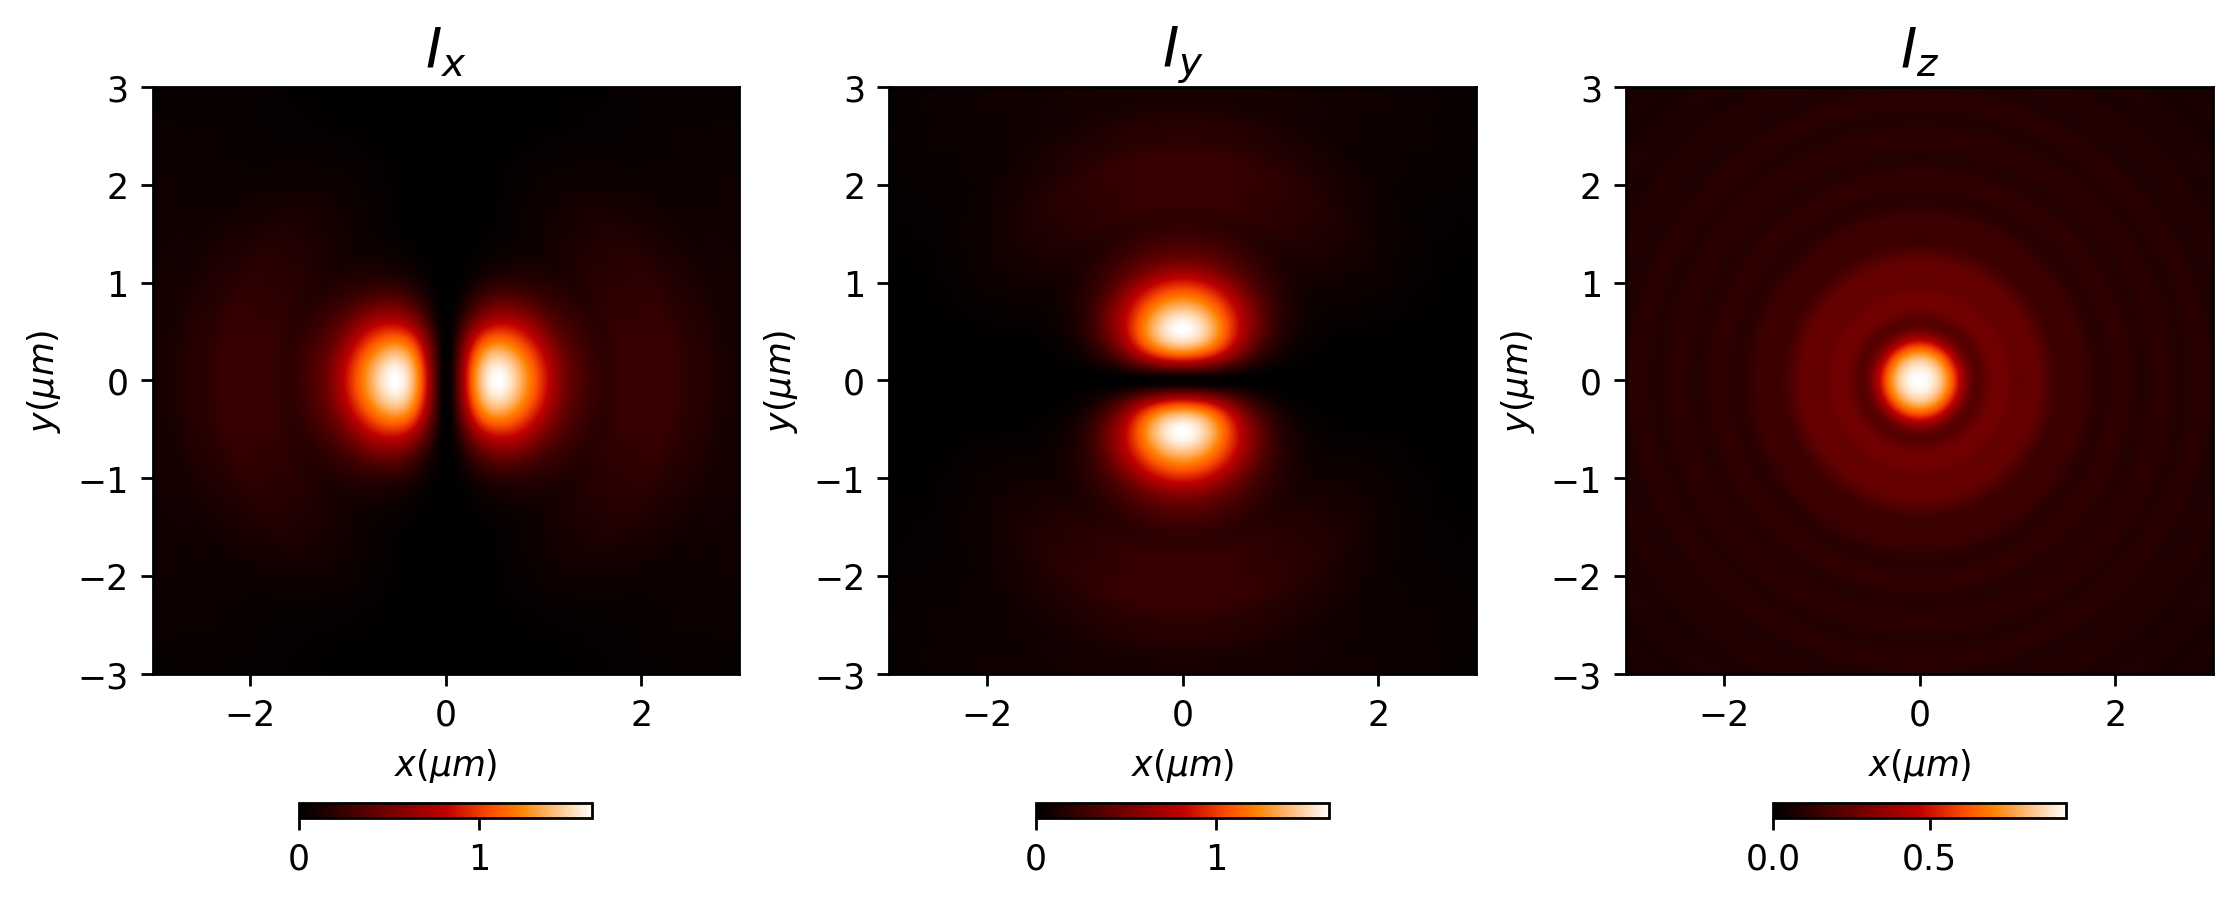

In [26]:
E1.draw('intensities', logarithm=1e-1)

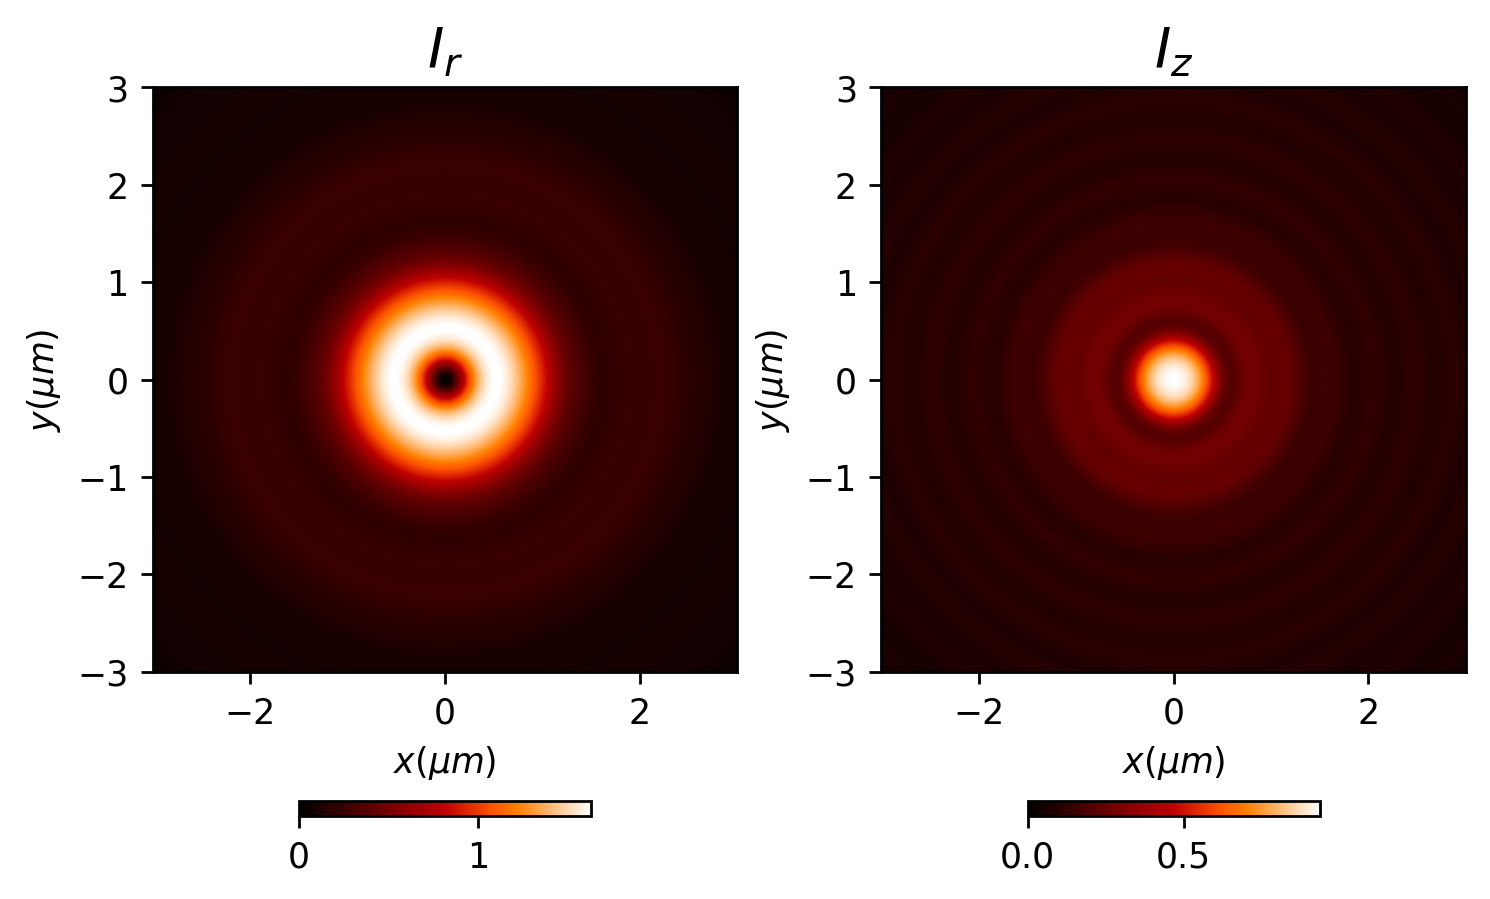

In [27]:
E1.draw('intensities_rz', logarithm=1e-1)

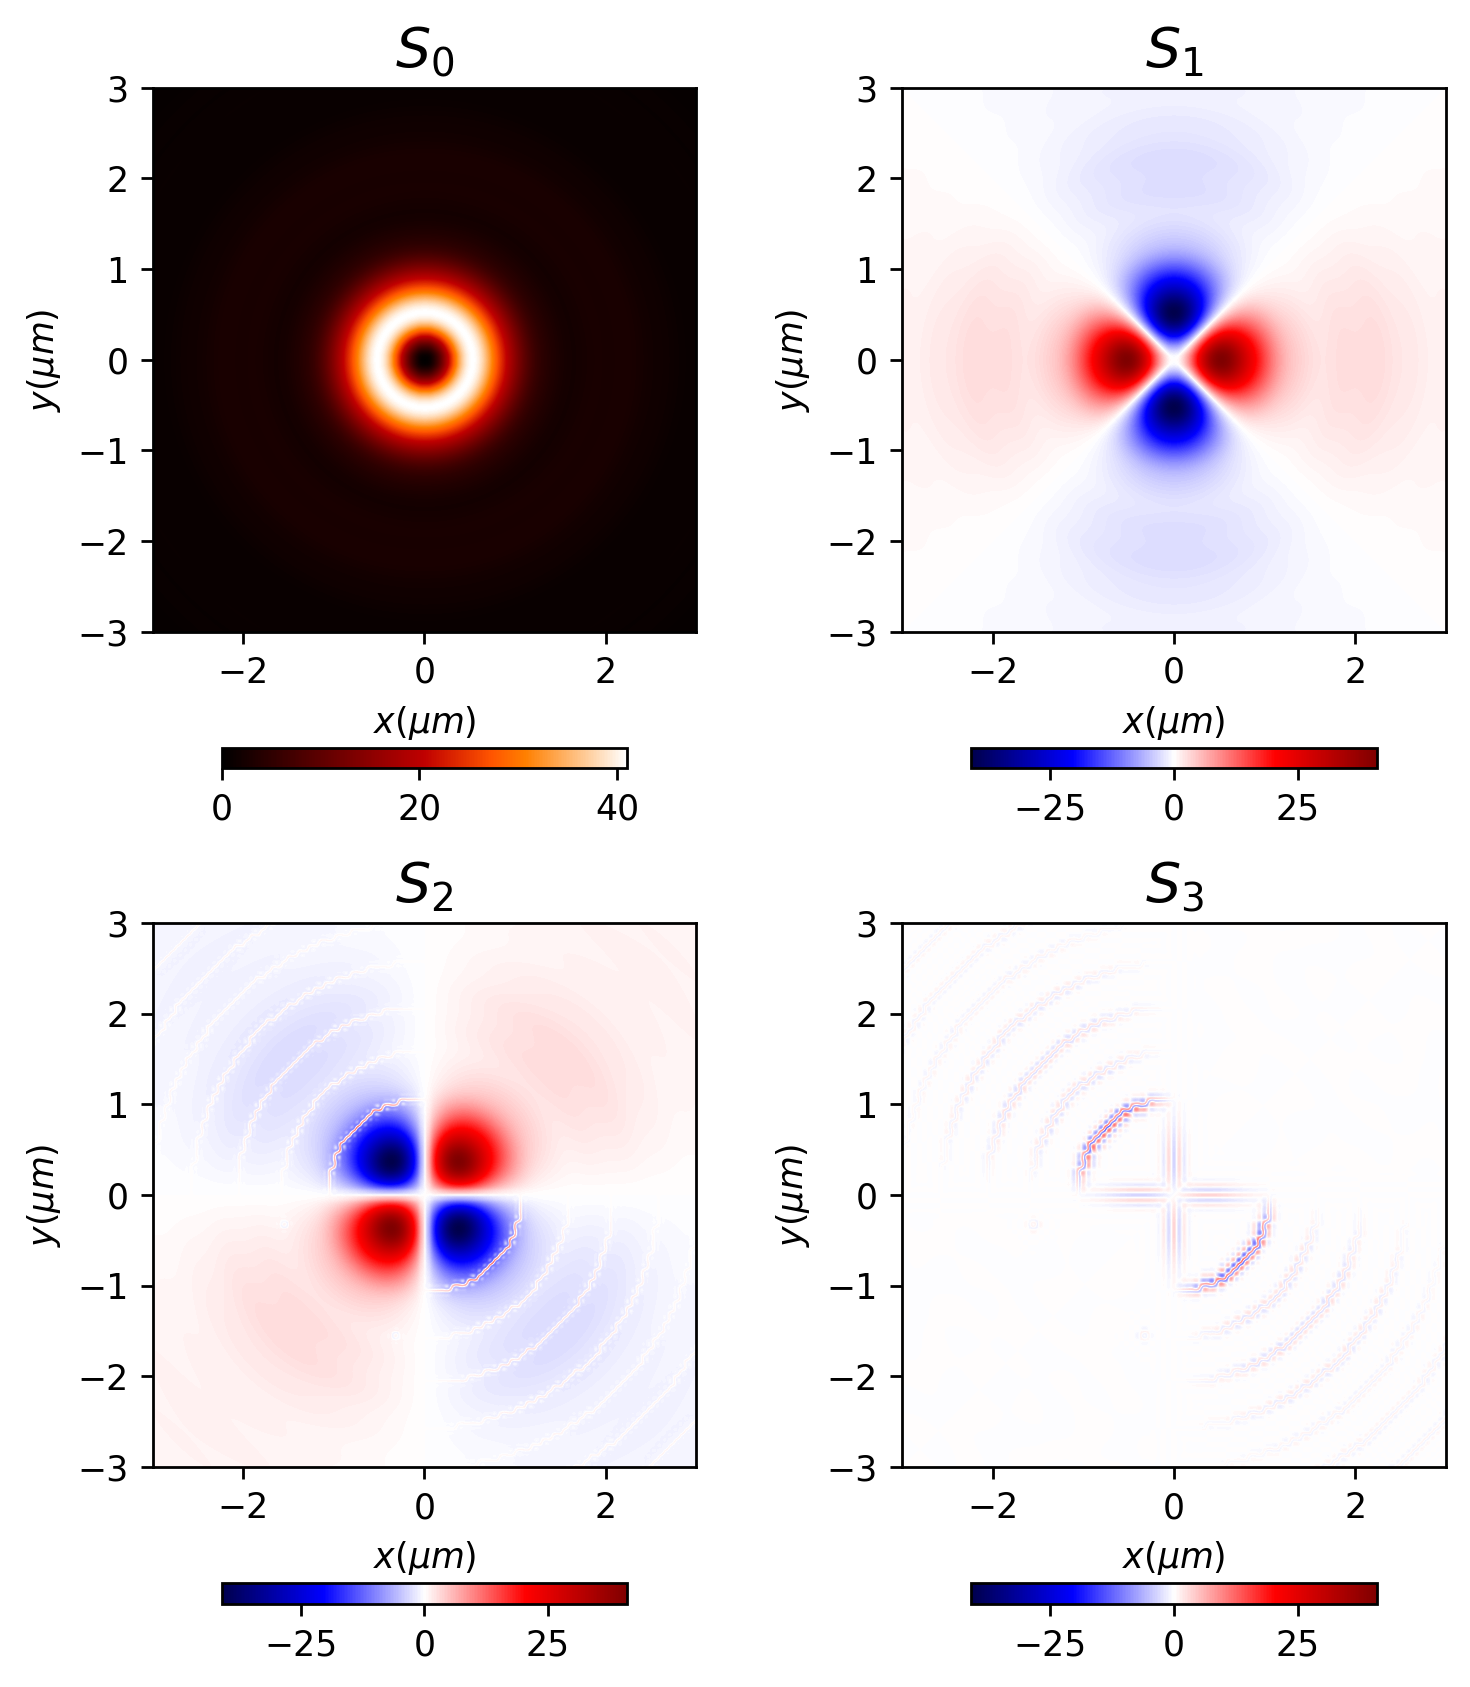

In [28]:
E1.draw('stokes')